# Lab 11 - Deep Learning
- **Author:** Suraj R. Nair, based on previous material by Emily Aiken.
- **Date:** April 3, 2024
- **Course:** INFO 251: Applied machine learning

## Topics:
1. Convolutional neural networks

## Learning Goals:
At the end of this lab, you will...
- Understand the structure of convolutional neural networks
- Know the key hyperparameters of convolutional neural networks

## Resources:
- [Keras dropout layer](https://keras.io/api/layers/regularization_layers/dropout/)
- [Keras convolutional layers](https://keras.io/api/layers/convolution_layers/)
- [Keras pooling layers](https://keras.io/api/layers/pooling_layers/)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import random

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, roc_auc_score, accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.regularizers import l1, l2
import tensorflow as tf

## Convolutional Neural Networks
#### Load MNIST data
- Notice: All images are the same size
- Notice: Images are in greyscale --> only one channel for CNN

In [ ]:
# Load data
digits = datasets.load_digits()

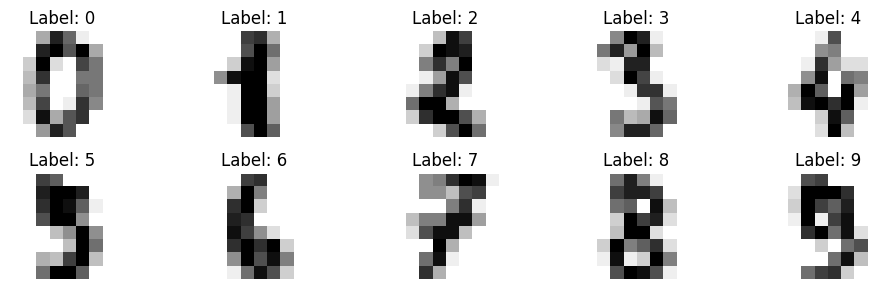

In [ ]:
# Show some of the images
fig, ax = plt.subplots(2, 5, figsize=(10, 3))
ax = ax.flatten()
for a, image, label in zip(ax, digits.images, digits.target):
    a.set_axis_off()
    a.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    a.set_title("Label: %i" % label)
plt.tight_layout()
plt.show()

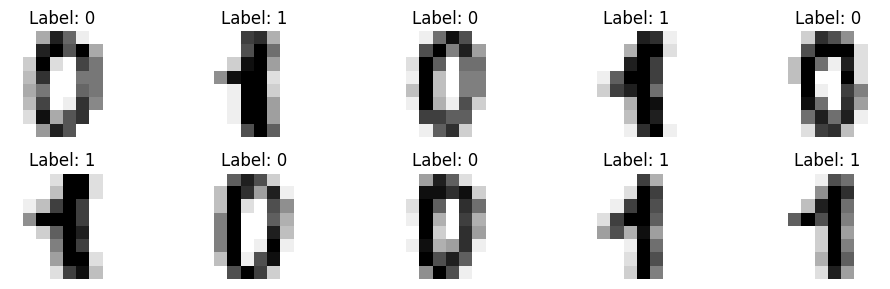

In [ ]:
# Restrict to two classes -- we'll just look for the difference between 1 and 0
twos_threes = np.where((digits.target == 0) | (digits.target == 1))
x = digits.images[twos_threes]
y = digits.target[twos_threes]

fig, ax = plt.subplots(2, 5, figsize=(10, 3))
ax = ax.flatten()
for a, image, label in zip(ax, x, y):
    a.set_axis_off()
    a.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    a.set_title("Label: %i" % label)
plt.tight_layout()
plt.show()

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.25, random_state=0)

In [ ]:
x_train.shape

(270, 8, 8)

#### Preprocessing

In [ ]:
# Standardization
mean_pixel = np.mean(x_train, axis=0)
std_pixel = np.std(x_train, axis=0) + 0.000000001
x_train = (x_train - mean_pixel)/std_pixel
x_test = (x_test - mean_pixel)/std_pixel

In [ ]:
# Reshape train data
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

#### CNN: Single Conv Layer

In [ ]:

model_base = Sequential()
model_base.add(Conv2D(3, kernel_size=(3, 3), strides=1,
                    activation='relu', input_shape=x_train.shape[1:]))
model_base.add(Flatten())
model_base.add(Dense(1, activation='sigmoid'))
model_base.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'],
                   )

In [ ]:
history = model_base.fit(x_train, y_train, epochs=10, batch_size=16, verbose=1,
                         validation_data = ())
yhat_train = model_base.predict(x_train)
yhat_test = model_base.predict(x_test)

Epoch 1/10
17/17 [==============================] - 0s 5ms/step - loss: 0.1253 - accuracy: 0.9963
Epoch 2/10
17/17 [==============================] - 0s 6ms/step - loss: 0.1056 - accuracy: 0.9963
Epoch 3/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0903 - accuracy: 0.9963
Epoch 4/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0786 - accuracy: 0.9963
Epoch 5/10
17/17 [==============================] - 0s 6ms/step - loss: 0.0690 - accuracy: 0.9963
Epoch 6/10
17/17 [==============================] - 0s 5ms/step - loss: 0.0615 - accuracy: 0.9963
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0551 - accuracy: 0.9963
Epoch 8/10
17/17 [==============================] - 0s 8ms/step - loss: 0.0500 - accuracy: 0.9963
Epoch 9/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0456 - accuracy: 0.9963
Epoch 10/10
3/3 [==============================] - 0s 3ms/step


In [ ]:
history.history

{'loss': [0.1253078281879425,
  0.10564205795526505,
  0.0903359204530716,
  0.07856947928667068,
  0.06898506730794907,
  0.06154152378439903,
  0.055096760392189026,
  0.049994610249996185,
  0.045600783079862595,
  0.04176948964595795],
 'accuracy': [0.9962962865829468,
  0.9962962865829468,
  0.9962962865829468,
  0.9962962865829468,
  0.9962962865829468,
  0.9962962865829468,
  0.9962962865829468,
  0.9962962865829468,
  0.9962962865829468,
  0.9962962865829468]}

In [ ]:
yhat_train_binary = yhat_train > 0.5
yhat_test_binary = yhat_test > 0.5

print('Accuracy score on training set: %.4f' % accuracy_score(y_train, yhat_train_binary))
print('Accuracy score on test set: %.4f' % accuracy_score(y_test, yhat_test_binary))
print('AUC score on training set: %.4f' % roc_auc_score(y_train, yhat_train))
print('AUC score on test set: %.4f' % roc_auc_score(y_test, yhat_test))

Accuracy score on training set: 0.9963
Accuracy score on test set: 1.0000
AUC score on training set: 0.9999
AUC score on test set: 1.0000


In [ ]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 3)           30        
                                                                 
 flatten (Flatten)           (None, 108)               0         
                                                                 
 dense (Dense)               (None, 1)                 109       
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

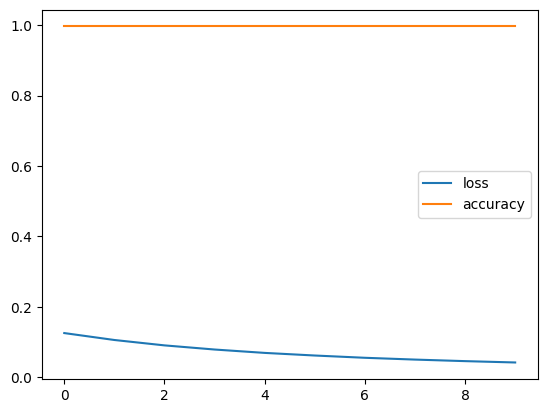

In [ ]:
### Plotting epoch-wise summary

pd.DataFrame(history.history).plot()

#### CNN: More Layers + Pooling

In [ ]:
# TODO: Tune the above CNN. Consider changing the convolutional filters, adding dropout layers, changing the
# activation functions, or changing the optimization strategy. Try to exceed 0.98 AUC on the test set.

In [ ]:
model = Sequential()
model.add(Conv2D(filters=24, kernel_size=(3, 3), strides=1, activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=1, activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(12, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 6, 6, 24)          240       
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 12)          2604      
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 12)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 2, 2, 12)          0         
                                                                 
 flatten_1 (Flatten)         (None, 48)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                588       
                                                      

In [ ]:
history1 = model.fit(x_train, y_train, epochs=30, batch_size=32, verbose=0)
yhat_train1 = model.predict(x_train)
yhat_test1 = model.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [ ]:
yhat_train_binary1 = yhat_train1 > 0.5
yhat_test_binary1 = yhat_test1 > 0.5

print('Accuracy score on training set: %.4f' % accuracy_score(y_train, yhat_train_binary1))
print('Accuracy score on test set: %.4f' % accuracy_score(y_test, yhat_test_binary1))
print('AUC score on training set: %.4f' % roc_auc_score(y_train, yhat_train1))
print('AUC score on test set: %.4f' % roc_auc_score(y_test, yhat_test1))

Accuracy score on training set: 1.0000
Accuracy score on test set: 0.9889
AUC score on training set: 1.0000
AUC score on test set: 0.9744


In [ ]:
### Under the hood

In [ ]:
model.layers

In [ ]:
weights, biases = model.layers[0].get_weights()

In [ ]:
weights.shape

(3, 3, 1, 24)

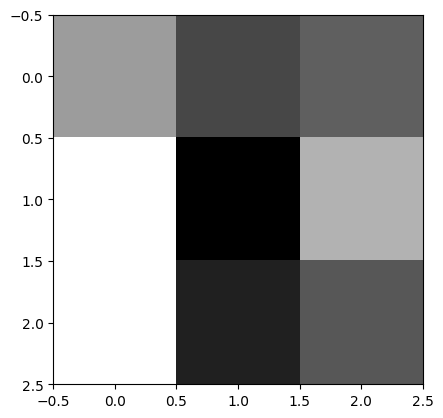

In [ ]:
plt.imshow(weights[:, :, :, 0], cmap = 'gray')